In [2]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import illustris_python as il
import h5py as hp

pplib.imports()

CROSSPATH = '/Users/cosinga/overleaf/higal_cross/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/'

def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

In [3]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1, -1), frameon = False, fontsize = 12, loc = 'lower left')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.setXLabel(pplib.wnum())
ds.setYLabel(pplib.pklab('HI', 'gal'))
ds.setOrder('snapshot', [99, 67, 50])
ds.displayAs('censat', ['centrals_satellites', 'satellites_centrals', 'satellites', 'centrals', 'both'], ['HI (cen) x Gal (sat)', 'Gal (cen) x HI (sat)', 'Satellites', 'Centrals', 'All Terms'])



In [4]:
f = hp.File("/Users/cosinga/code/hcolor/fig_md_analysis/population_hists050.hdf5", 'r')
print(list(f.keys()))
f['galaxy_blue_satellites'][1]

['galaxy_blue_both', 'galaxy_blue_centrals', 'galaxy_blue_satellites', 'galaxy_red_both', 'galaxy_red_centrals', 'galaxy_red_satellites', 'galaxy_resolved_both', 'galaxy_resolved_centrals', 'galaxy_resolved_satellites', 'hisubhalo_GD14_map', 'hisubhalo_GD14_vol', 'hisubhalo_GK11_map', 'hisubhalo_GK11_vol', 'hisubhalo_K13_map', 'hisubhalo_K13_vol', 'hisubhalo_L08_map', 'hisubhalo_S14_map', 'hisubhalo_S14_vol', 'hisubhalo_stmass']


array([6.44988142e+11, 2.61314891e+12, 4.75920964e+12, 8.59359412e+12,
       1.34621660e+13, 1.81905140e+13, 1.22748865e+13, 3.21978683e+12,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [5]:
sat_fracs = {}

for snap in [50, 67, 99]:
    f = hp.File("/Users/cosinga/code/hcolor/fig_md_analysis/population_hists%03d.hdf5"%snap, 'r')
    for color in ['blue', 'red']:
        sfrac = np.sum(f['galaxy_%s_satellites'%color][1]) / np.sum(f['galaxy_%s_both'%color][1])
        sat_fracs["%s_%03d"%(color, snap)] = sfrac
sat_fracs


{'blue_050': 0.2540550419371162,
 'red_050': 0.4718141994498197,
 'blue_067': 0.27735334880656043,
 'red_067': 0.3960159199046421,
 'blue_099': 0.2922316025819302,
 'red_099': 0.35562061010441415}

# Decomposing HI auto power

The row values for color: ['blue', 'red', 'no key found']
The column values for censat: ['centrals', 'satellites', 'centrals_satellites']


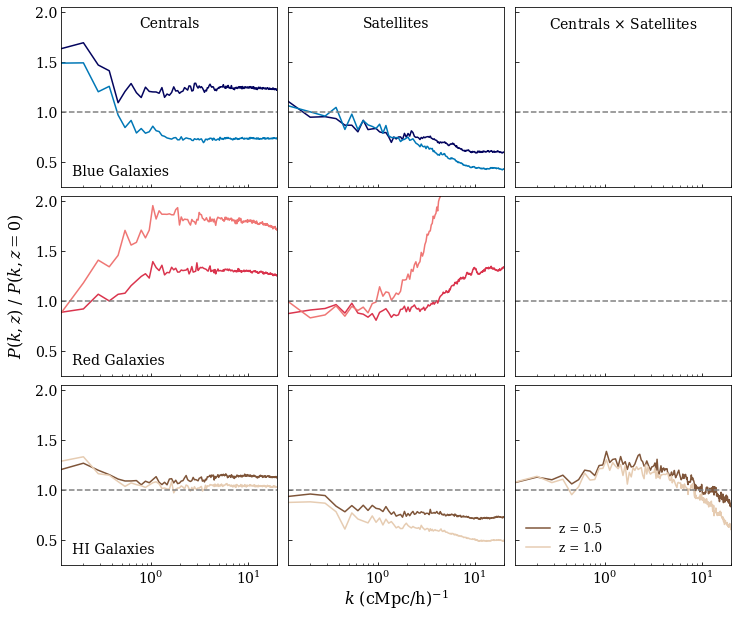

In [6]:
numer = [99, 67, 50]
denom = 99
numer.remove(denom)
numer.sort()
ip = {'fieldname':['hisubhalo', 'galaxy'], 'snapshot':[99, 67, 50],
     'censat':['centrals', 'satellites', 'centrals_satellites'],
     'path':'censat', 'space':'real', 'color':['blue', 'red', 'no key found']}
fg = ds.figrid('snapshot', 'color', 'censat', ip)

fg.setPanelsize(3, 2.5)

fg.gspecArgs(wspace = 0.05, hspace = 0.05)
fg.setCmap(['#e6ccb2', '#7f5539'], numer, {'fieldname':'hisubhalo'})
blue_colors = ['#0077b6', '#03045e']
red_colors = ['#ef7674', '#da344d']
fg.setCmap(red_colors, numer, {'color':'red'})
fg.setCmap(blue_colors, numer, {'color':'blue'})
fg.autoNorm({'snapshot':denom}, ['model'])
fg.autoFill()
fg.setDefaultTicksParams()
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'HI Galaxies'])
fg.colLabels(['Centrals', 'Satellites', 'Centrals $\\times$ Satellites'])
fg.setFunc({'figrid_process':'fill', 'snapshot':numer}, fill_mean)
fg.axisArgs(yscale = 'linear', ylim = (0.25, 2.05))
fg.setYLabel("$P (k, z)$ / $P (k, z = 0)$")
fg.plotOnes()
fg.plot()
# fg.save(CROSSPATH + 'auto_censat_zevo.pdf', dpi = 150)

[ 9.75821378e+13  4.74521481e+13  3.05589575e+13  1.84773077e+13
  1.70443664e+13  1.39163501e+13  1.11368230e+13  9.11696097e+12
  7.73658092e+12  6.76636289e+12  6.11043380e+12  5.19593066e+12
  4.84053823e+12  4.26041466e+12  4.12315970e+12  4.48840957e+12
  3.45162196e+12  3.97937026e+12  3.44007748e+12  3.44098307e+12
  3.33684646e+12  3.54223302e+12  3.26642532e+12  3.21327050e+12
  3.00359694e+12  2.54955364e+12  2.80574021e+12  2.55308977e+12
  2.43191769e+12  2.20176463e+12  1.99384316e+12  2.32860578e+12
  1.89270445e+12  2.20696487e+12  1.98401403e+12  2.04648897e+12
  1.98921467e+12  2.07157812e+12  2.04359138e+12  2.18552644e+12
  2.12710887e+12  2.31793725e+12  2.21759379e+12  2.33332888e+12
  2.24438062e+12  2.23743886e+12  2.20364109e+12  2.23023778e+12
  2.21238227e+12  2.10866621e+12  2.09377196e+12  1.93457079e+12
  1.84508189e+12  1.97248222e+12  1.91813750e+12  1.88542775e+12
  1.91165814e+12  1.90488080e+12  1.89273012e+12  1.81483198e+12
  1.88148135e+12  1.80651

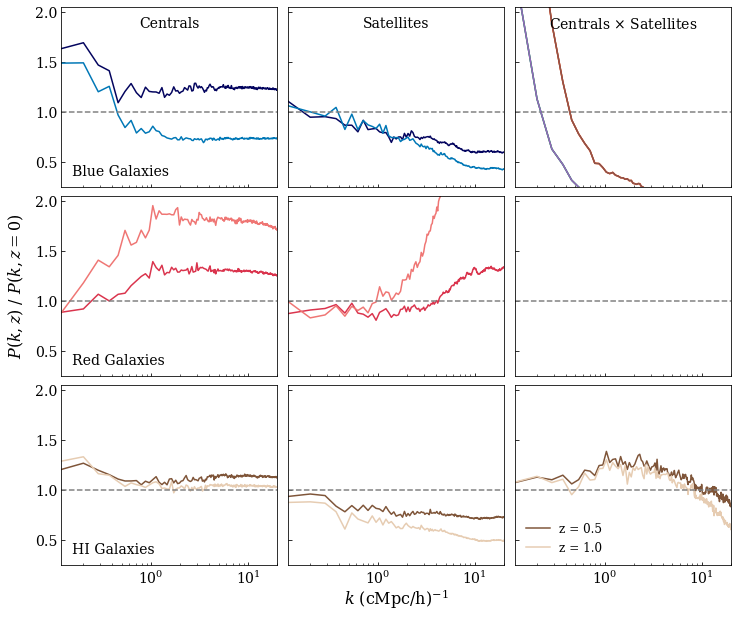

In [9]:
blueax = fg.axes[0, 2]
redax = fg.axes[1, 2]
f = hp.File(SAVEPATH + 'cenxsat_%d.hdf5'%denom, 'r')
blue_denom = f['blue_pk'][1]
red_denom = f['red_pk'][1]
print(blue_denom)
for i,ss in enumerate(numer):
    f = hp.File(SAVEPATH + 'cenxsat_%d.hdf5'%ss, 'r')
    data = f['blue_pk']
    blueax.plot(data[0], data[1] / blue_denom[i])
fg.fig